In [47]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F


In [17]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('.', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('.', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ])),
  batch_size=1000, shuffle=True)

100.1%

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


113.5%

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


100.4%

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


180.4%

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [18]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [68]:
class CNN(torch.nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
        )
        self.fc1 = torch.nn.Linear(784, 10)
        
    def forward(self, x):
        out = self.cnn(x)
        out = x.view(out.size(0), -1)
        out = self.fc1(out)
        return out

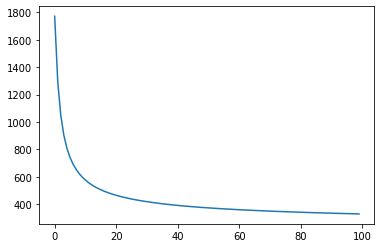

In [70]:
#train

model = CNN()
model.train()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
errors = []
for j in range(100):
    sum_errors = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        
        y_hat = model.forward(data)
        error = criterion(y_hat, target)
        sum_errors += error
        error.backward()
        optimizer.step()
    errors.append(sum_errors)

plt.plot(errors)

In [104]:
model.eval()
pred = []
with torch.no_grad():
    for data, target in test_loader:
        pred.append(model.forward(data))
x = pred[0].data.max(1, keepdim=True)[1]
print(x.eq(target.data.view_as(x)).sum())


tensor(102)


In [95]:
def test():
  model.eval()
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  print('{}/{} ({:.0f}%)'.format(correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [96]:
test()

9091/10000 (91%)
